In [ ]:
import sys
import re
import numpy as np
from pyspark import SparkContext
from csv import reader
from datetime import *
import seaborn as sns
import gzip
import folium
from folium.plugins import HeatMap
from random import sample 
import pandas as pd # data processing and manipulation
import plotly.express as px
import matplotlib.pyplot as plt
import pprint
import os, re

pp = pprint.PrettyPrinter(indent=2)
df = pd.read_csv('NYPD_Arrest_Data__Year_to_Date_.csv')

In [ ]:
# change arrest_boro abbreviation to long form
boro_dict = {
    'B': 'Bronx',
    'S': 'Staten Island',
    'K': 'Brooklyn',
    'M': 'Manhattan',
    'Q': 'Queens',
}
df['ARREST_BORO'] = df.ARREST_BORO.replace(boro_dict)

# change perp_sex abbreviation to long form
perp_sex_dict = {
    'F': 'Female',
    'M': 'Male',
}
df['PERP_SEX'] = df.PERP_SEX.replace(perp_sex_dict)

# change law_cat_cd abbreviation to long form
law_cat_cd_dict = {
    'F': 'Felony',
    'M': 'Misdemeanor',
    'V': 'Violation',
    'I': 'Traffic Infraction',
}
df['LAW_CAT_CD'] = df['LAW_CAT_CD'].replace(law_cat_cd_dict)

In [ ]:
def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

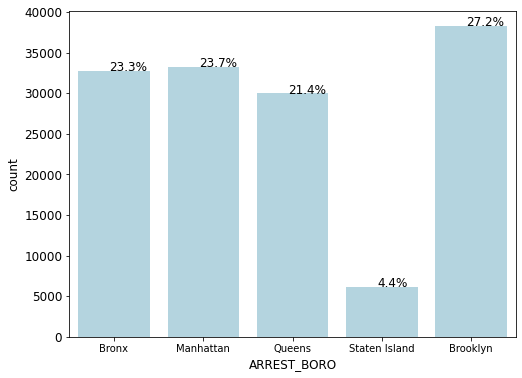

In [ ]:
plt.figure(figsize = (8, 6))
ax = sns.countplot('ARREST_BORO', data = df,color='lightblue')
plt.xlabel('ARREST_BORO', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12,)
without_hue(ax, df.ARREST_BORO)

Text(69.0, 0.5, '')

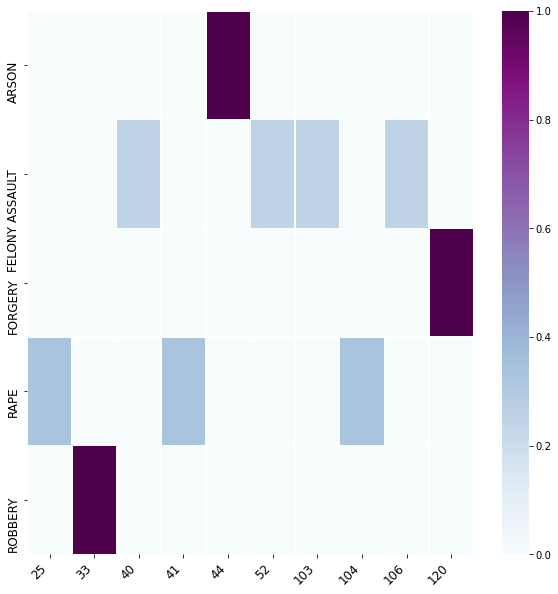

In [ ]:
offence = df[df['OFNS_DESC'].apply(lambda x: x in categs)]


# Build a cross table to get the number of each crime type per precint
both = pd.crosstab(offence['OFNS_DESC'], offence['ARREST_PRECINCT'][0:10]) 
# Calculate percentages of crimes
both = both.div(both.sum(axis=1), axis=0)
# Rearrange columns

# Transform into a heat map
fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(both,
                 cmap="BuPu", linewidths=.5)
plt.xticks(fontsize=12,rotation=45,ha='right')
plt.yticks(fontsize=12)
plt.xlabel("")
plt.ylabel("")

In [ ]:
#let's convert datetime
df['ARREST_DATE'] = df['ARREST_DATE'].astype('datetime64[ns]')
df['Month'] = df.ARREST_DATE.dt.month

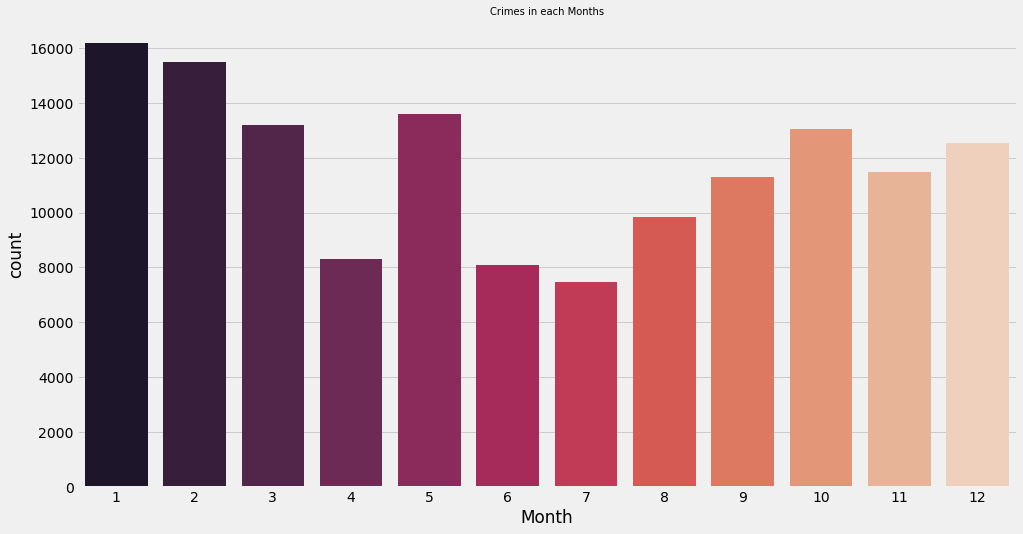

In [ ]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(df['Month'], palette = 'rocket',)
plt.title('Crimes in each Months', fontsize = 10)
plt.show()